## Importacion librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True
pd.options.display.float_format = '{:15.2f}'.format

## Carga de datos

In [2]:
df = pd.read_pickle("../Datos/df.pickle")
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   planta                136472 non-null  object 
 1   inverter_id           136472 non-null  object 
 2   kw_dc                 136472 non-null  float64
 3   kw_ac                 136472 non-null  float64
 4   kw_dia                136472 non-null  float64
 5   kw_total              136472 non-null  float64
 6   sensor_id             136472 non-null  object 
 7   temperatura_ambiente  136472 non-null  float64
 8   temperatura_modulo    136472 non-null  float64
 9   irradiacion           136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.5+ MB


## Creacion de variables

In [4]:
def componentes_fecha(dataframe):
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    
    return pd.DataFrame({"mes": mes, "dia":dia, "hora":hora, "minuto":minuto})

In [5]:
df = pd.concat([df.reset_index(), componentes_fecha(df)], axis=1).set_index("fecha")
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45


**Creamos la variable eficiencia**: % de corriente de DC que se consigue transformar en corriente AC mediante el inverter. 



In [6]:
def eficiencia_inverter(AC, DC): 
    temp = (AC/DC) * 100
    return temp.fillna(0) #Casos en los que DC sea 0, por ejemplo por la noche 

In [7]:
df["eficiencia"] = eficiencia_inverter(df.kw_ac, df.kw_dc)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,temperatura_ambiente,temperatura_modulo,irradiacion,mes,dia,hora,minuto,eficiencia
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00


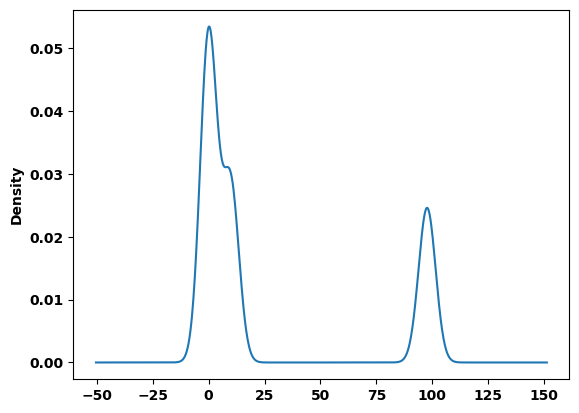

In [80]:
df.eficiencia.plot.kde();

- Distribucion bimodal, hay dos grupos claramente diferenciados,la planta 1 con valores cercanos al 0, y planta 2 donde los valores de AC eran my similares a los valores de DC y la eficiencia estaba en torno al 90%

## Reordenamiento del DataFrame

In [8]:
orden_columnas = ['planta','mes', 'dia', 'hora', 'minuto','sensor_id','irradiacion','temperatura_ambiente', 'temperatura_modulo', 
                 'inverter_id', 'kw_dc', 'kw_ac','eficiencia','kw_dia', 'kw_total']

In [9]:
df = df[orden_columnas]
df[1000:1050]

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,temperatura_ambiente,temperatura_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,ZnxXDlPa8U1GXgE,6904.57,676.07,9.79,2281.14,6524453.14
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,ZoEaEvLYb1n2sOq,7285.12,712.77,9.78,2355.88,7100454.88
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,adLQvlD726eNBSB,8083.86,790.20,9.78,2365.14,6273720.14
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,bvBOhCH3iADSZry,7353.12,719.06,9.78,2024.38,6318827.38
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,iCRJl6heRkivqQ3,7060.29,690.76,9.78,2502.43,7180494.43
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,ih0vzX44oOqAx2f,5802.14,568.57,9.80,2316.86,6187503.80
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,pkci93gMrogZuBj,7745.00,757.57,9.78,2539.14,7171641.14
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,rGa61gmuvPhdLxV,7697.00,752.64,9.78,2490.57,7113983.57
2020-05-15 11:30:00,p1,5,15,11,30,HmiyD2TTLFNqkNe,0.56,30.29,49.84,sjndEbLyjtCKgGv,6705.29,656.57,9.79,2483.43,7019315.43


- El dataset esta a un nivel de agregación de planta, ventanas temporales de 15 minutos e inverter. 
- Puede ser interesante tener el dataset a un nivel de agregación de día. 

## Dataframe a nivel diario

In [13]:
df_diario = df.groupby(["planta", "inverter_id"]).resample("D").agg({"irradiacion":["min", "mean", "max"],
                                                         "temperatura_ambiente":["min", "mean", "max"],
                                                         "temperatura_modulo":["min", "mean", "max"],
                                                         "kw_dc":["min","mean", "max","sum"],
                                                         "kw_ac":["min", "mean", "max","sum"],
                                                         "eficiencia":["min", "mean", "max"],
                                                         "kw_dia":["max"],
                                                         "kw_total":["max"]
                                                
                                                        })
df_diario

irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                       2020-06-14            0.00            0.23   
                       2020-06-15            0.00            0.19   
                       2020-06-16            0.00            0.17   
                       2020-06-17            0.00            0.12   

                                                  temperatura_ambiente  \
                                              max                  min   
planta inverter_id     fecha                                             
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89                22.04   
                       2020-05-16            0.81                21.50   
                       2020-05-17            1.00                21.21   
                       2020-05-18            0.97                20.96   
                       2020-05-19            0.84                22.39   
...                                           ...                  ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.93                22.20   
                       2020-06-14            0.92                23.65   
                       2020-06-15            0.83                24.00   
                       2020-06-16            0.77                23.63   
                       2020-06-17            0.58                22.55   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                       2020-06-14           27.02           32.96   
                       2020-06-15           26.56           31.61   
                       2020-06-16           26.37           30.83   
                       2020-06-17           24.85           29.04   

                                  temperatura_modulo                  \
                                                 min            mean   
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15              20.29           32.58   
                       2020-05-16              19.59           31.86   
                       2020-05-17              20.38           32.74   
                       2020-05-18              19.48           27.81   
                       2020-05-19              20.06           29.73   
...                                              ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13              20.88           30.39   
                       2020-06-14              22.12           31.59   
                       2020-06-15              23.00           30.00   
                       2020-06-16              22.56           29.59   
                       2020-06-17              21.91           26.67   

                                                          

- **Quitamos el multi indice en las columnas** método to_flat_index()

In [14]:
tuplas = df_diario.columns.to_flat_index()
tuplas

Index([          ('irradiacion', 'min'),          ('irradiacion', 'mean'),
                 ('irradiacion', 'max'),  ('temperatura_ambiente', 'min'),
       ('temperatura_ambiente', 'mean'),  ('temperatura_ambiente', 'max'),
          ('temperatura_modulo', 'min'),   ('temperatura_modulo', 'mean'),
          ('temperatura_modulo', 'max'),                 ('kw_dc', 'min'),
                      ('kw_dc', 'mean'),                 ('kw_dc', 'max'),
                       ('kw_dc', 'sum'),                 ('kw_ac', 'min'),
                      ('kw_ac', 'mean'),                 ('kw_ac', 'max'),
                       ('kw_ac', 'sum'),            ('eficiencia', 'min'),
                 ('eficiencia', 'mean'),            ('eficiencia', 'max'),
                      ('kw_dia', 'max'),              ('kw_total', 'max')],
      dtype='object')

In [15]:
df_diario.columns = ["_".join(par) for par in tuplas]
df_diario

irradiacion_min  irradiacion_mean  \
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15             0.00              0.20   
                       2020-05-16             0.00              0.21   
                       2020-05-17             0.00              0.24   
                       2020-05-18             0.00              0.16   
                       2020-05-19             0.00              0.19   
...                                            ...               ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.00              0.22   
                       2020-06-14             0.00              0.23   
                       2020-06-15             0.00              0.19   
                       2020-06-16             0.00              0.17   
                       2020-06-17             0.00              0.12   

                                   irradiacion_max  temperatura_ambiente_min  \
planta inverter_id     fecha                                                   
p1     1BY6WEcLGh8j5v7 2020-05-15             0.89                     22.04   
                       2020-05-16             0.81                     21.50   
                       2020-05-17             1.00                     21.21   
                       2020-05-18             0.97                     20.96   
                       2020-05-19             0.84                     22.39   
...                                            ...                       ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.93                     22.20   
                       2020-06-14             0.92                     23.65   
                       2020-06-15             0.83                     24.00   
                       2020-06-16             0.77                     23.63   
                       2020-06-17             0.58                     22.55   

                                   temperatura_ambiente_mean  \
planta inverter_id     fecha                                   
p1     1BY6WEcLGh8j5v7 2020-05-15                      27.43   
                       2020-05-16                      26.78   
                       2020-05-17                      26.69   
                       2020-05-18                      23.85   
                       2020-05-19                      25.34   
...                                                      ...   
p2     xoJJ8DcxJEcupym 2020-06-13                      26.12   
                       2020-06-14                      27.02   
                       2020-06-15                      26.56   
                       2020-06-16                      26.37   
                       2020-06-17                      24.85   

                                   temperatura_ambiente_max  \
planta inverter_id     fecha                                  
p1     1BY6WEcLGh8j5v7 2020-05-15                     34.43   
                       2020-05-16                     32.52   
                       2020-05-17                     35.25   
                       2020-05-18                     28.37   
                       2020-05-19                     30.37   
...                                                     ...   
p2     xoJJ8DcxJEcupym 2020-06-13                     31.91   
                       2020-06-14                     32.96   
                       2020-06-15                     31.61   
                       2020-06-16                     30.83   
                       2020-06-17                     29.04   

                                   temperatura_modulo_min  \
planta inverter_id     fecha                                
p1     1BY6WEcLGh8j5v7 2020-05-15                   20.29   
                       2020-05-16                   19.59   
                       2020-05-17                   20.38   
                       2020-05-18                   19.48   
                       2020-05-19     

- Pasamos planta e inverter como columnas y dejamos la fecha como índice

In [16]:
df_diario = df_diario.reset_index().set_index("fecha")
df_diario

,planta,inverter_id,irradiacion_min,irradiacion_mean,irradiacion_max,temperatura_ambiente_min,temperatura_ambiente_mean,temperatura_ambiente_max,temperatura_modulo_min,temperatura_modulo_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,eficiencia_min,eficiencia_mean,eficiencia_max,kw_dia_max,kw_total_max
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.00,0.22,0.93,22.20,26.12,31.91,20.88,30.39,...,27443.74,0.00,279.59,1239.95,26840.58,0.00,51.91,98.29,6632.00,209312200.00
2020-06-14,p2,xoJJ8DcxJEcupym,0.00,0.23,0.92,23.65,27.02,32.96,22.12,31.59,...,30768.78,0.00,313.43,1328.21,30088.97,0.00,51.94,99.92,7268.00,209319687.00
2020-06-15,p2,xoJJ8DcxJEcupym,0.00,0.19,0.83,24.00,26.56,31.61,23.00,30.00,...,25597.24,0.00,260.93,1256.67,25049.49,0.00,52.94,98.27,7412.67,209325949.00


**Guardamos el dataset diario**

In [17]:
df.to_pickle("../DATOS/df.pickle")

In [18]:
df_diario.to_pickle("../DATOS/df_diario.pickle")